### Enigme : Les quatre chevelures

##### Problématique


***
Lors d’un carnaval, Alice, Bob, Charlie et Dalia décident de participer à un concours pour gagner un voyage inter-spatial dans l'espace. Le défi? Chaque personne doit deviner sa propre couleur de chevelure. L'équipe devra travailler ensemble pour trouver la bonne stratégie afin de déterminer la couleur orange ou indigo de toutes les chevelures. Vous appliquerez un nouveau concept, celui de la parité. 
***

##### Solution


***
Alice observe un nombre pair de chevelures indigo, elle annoncera "orange", sinon "indigo". De cette façon, elle a une chance sur deux de deviner correctement sa propre couleur et fournit en même temps une indication utile aux autres participants. Chaque personne suivante peut alors déduire la couleur de ses cheveux en se basant sur les réponses précédentes. Ainsi, l'équipe obtient au moins trois réponses correctes sur quatre et, la moitié du temps, réussit à avoir un score parfait de quatre sur quatre. 
***

## Initier le circuit

In [23]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

##### Nous créons 8 qbit en tout : 
- 4 qui représentent les participants
- 4 qui représentent le résonnement de chaque participant (Alice, Bob, Charlie, Dalia)

In [7]:
QC = QuantumCircuit(8)

##### Les 4 premiers qbit seront des portes Hadamard 


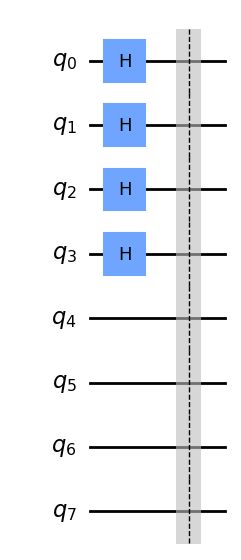

In [8]:
QC.h([0,1,2,3])
QC.barrier()
QC.draw('mpl')

#### Avec des portes CNOT : 
#### Alice récupère les informations de chevelures devant elle et calcule le nombre pair ou impair d'indigo

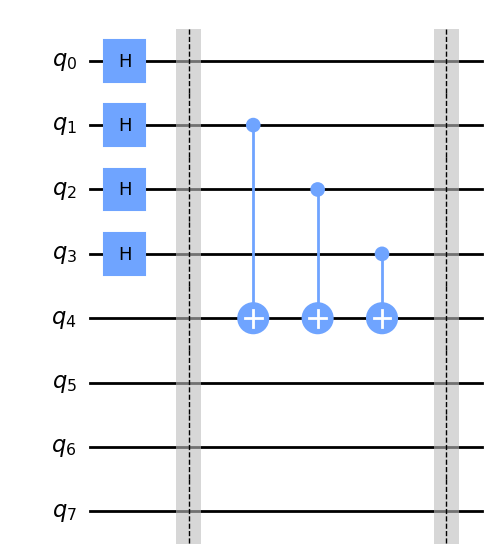

In [9]:
QC.cx(1,4)
QC.cx(2,4)
QC.cx(3,4)
QC.barrier()
QC.draw('mpl')

### Bob, Charlie et Dalia vont se servir de la réponse de la personne qui les précède pour faire un raisonnement

/home/yasser/Documents/quantum_computing/quantum/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


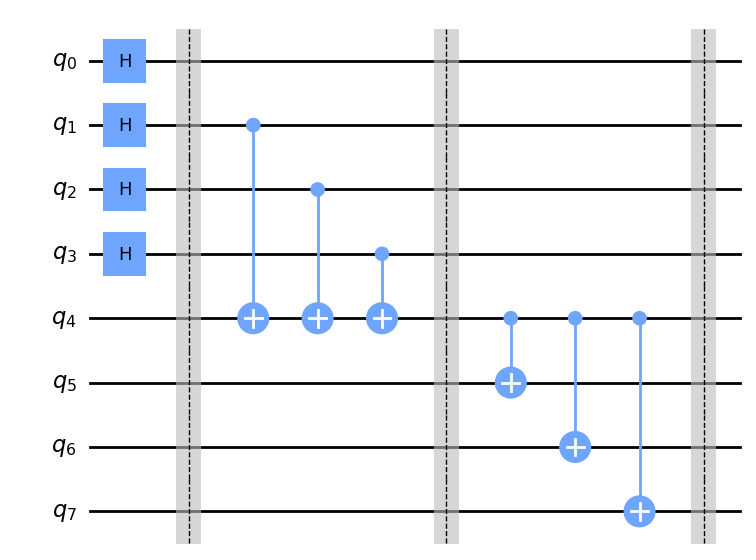

In [11]:
QC.cx(4,5)
QC.cx(4,6)
QC.cx(4,7)
QC.barrier()
QC.draw('mpl')

/home/yasser/Documents/quantum_computing/quantum/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


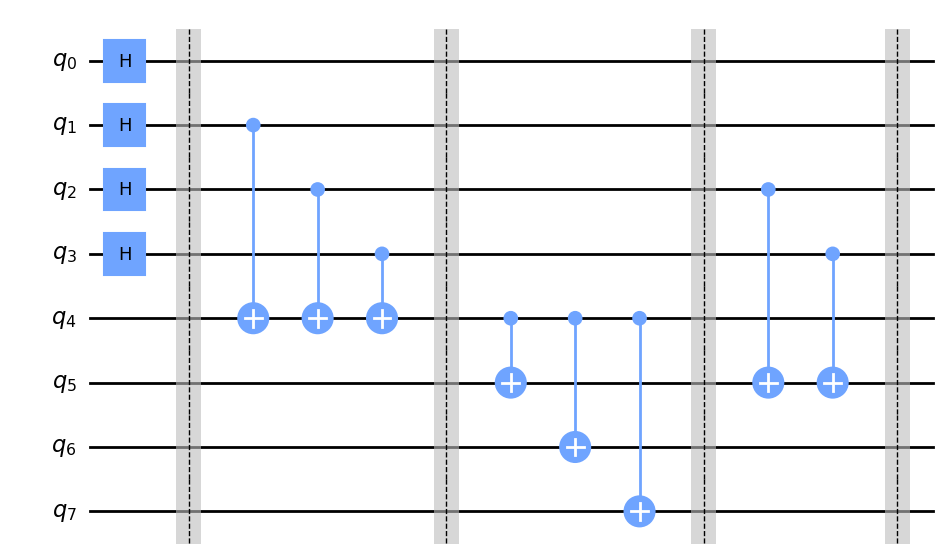

In [12]:
QC.cx(2, 5)
QC.cx(3, 5)
QC.barrier()
QC.draw('mpl')

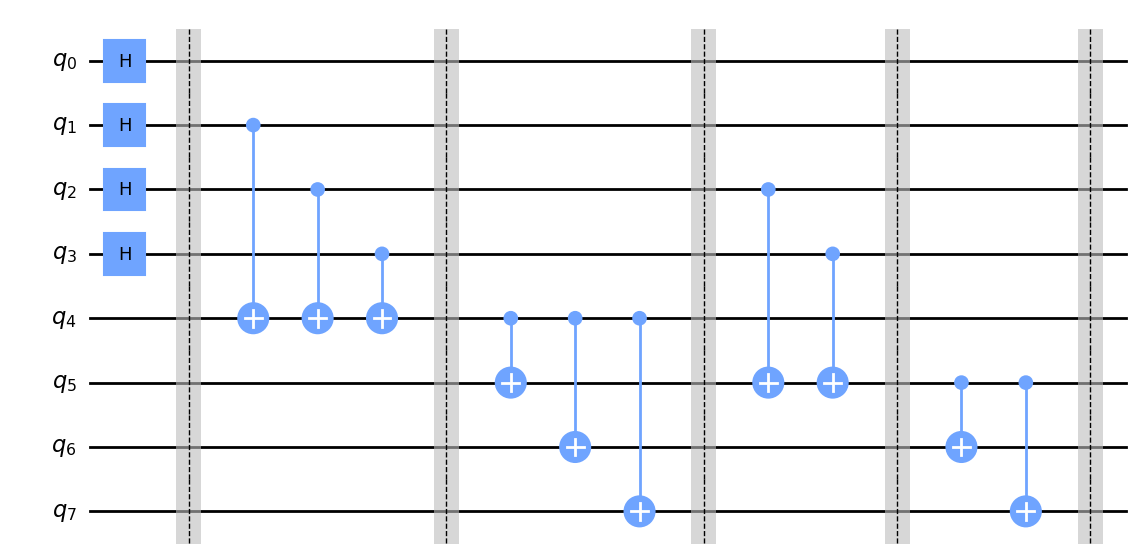

In [13]:
QC.cx(5, 6)
QC.cx(5, 7)
QC.barrier()
QC.draw('mpl')


#### Maintenant Charlie note la couleur de la chevelure de Dalia et annonce la couleur de la sienne

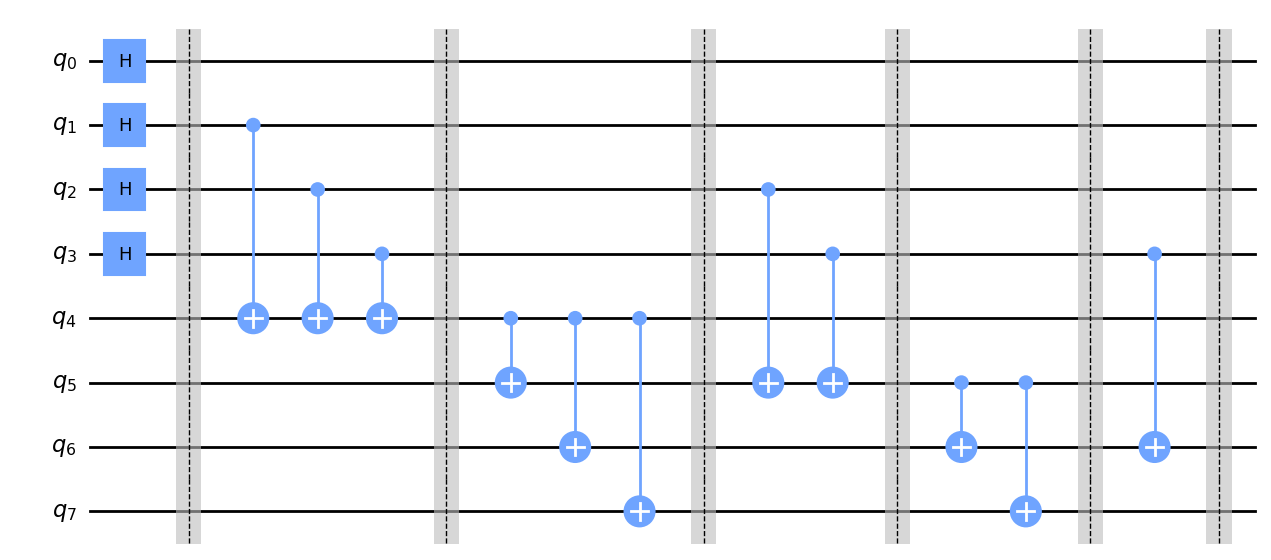

In [14]:
QC.cx(3, 6)
QC.barrier()
QC.draw(output='mpl')

#### Maintenant Dalia prend note des réponses et annonce sa couleur

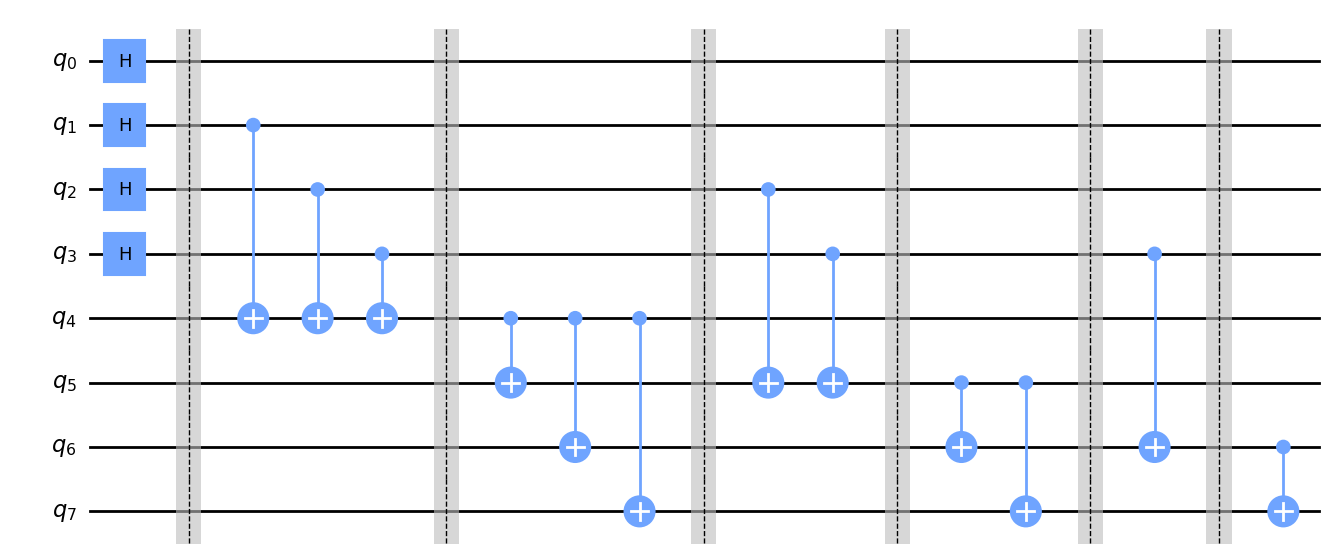

In [15]:
QC.cx(6, 7)
QC.draw(output='mpl')

/home/yasser/Documents/quantum_computing/quantum/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


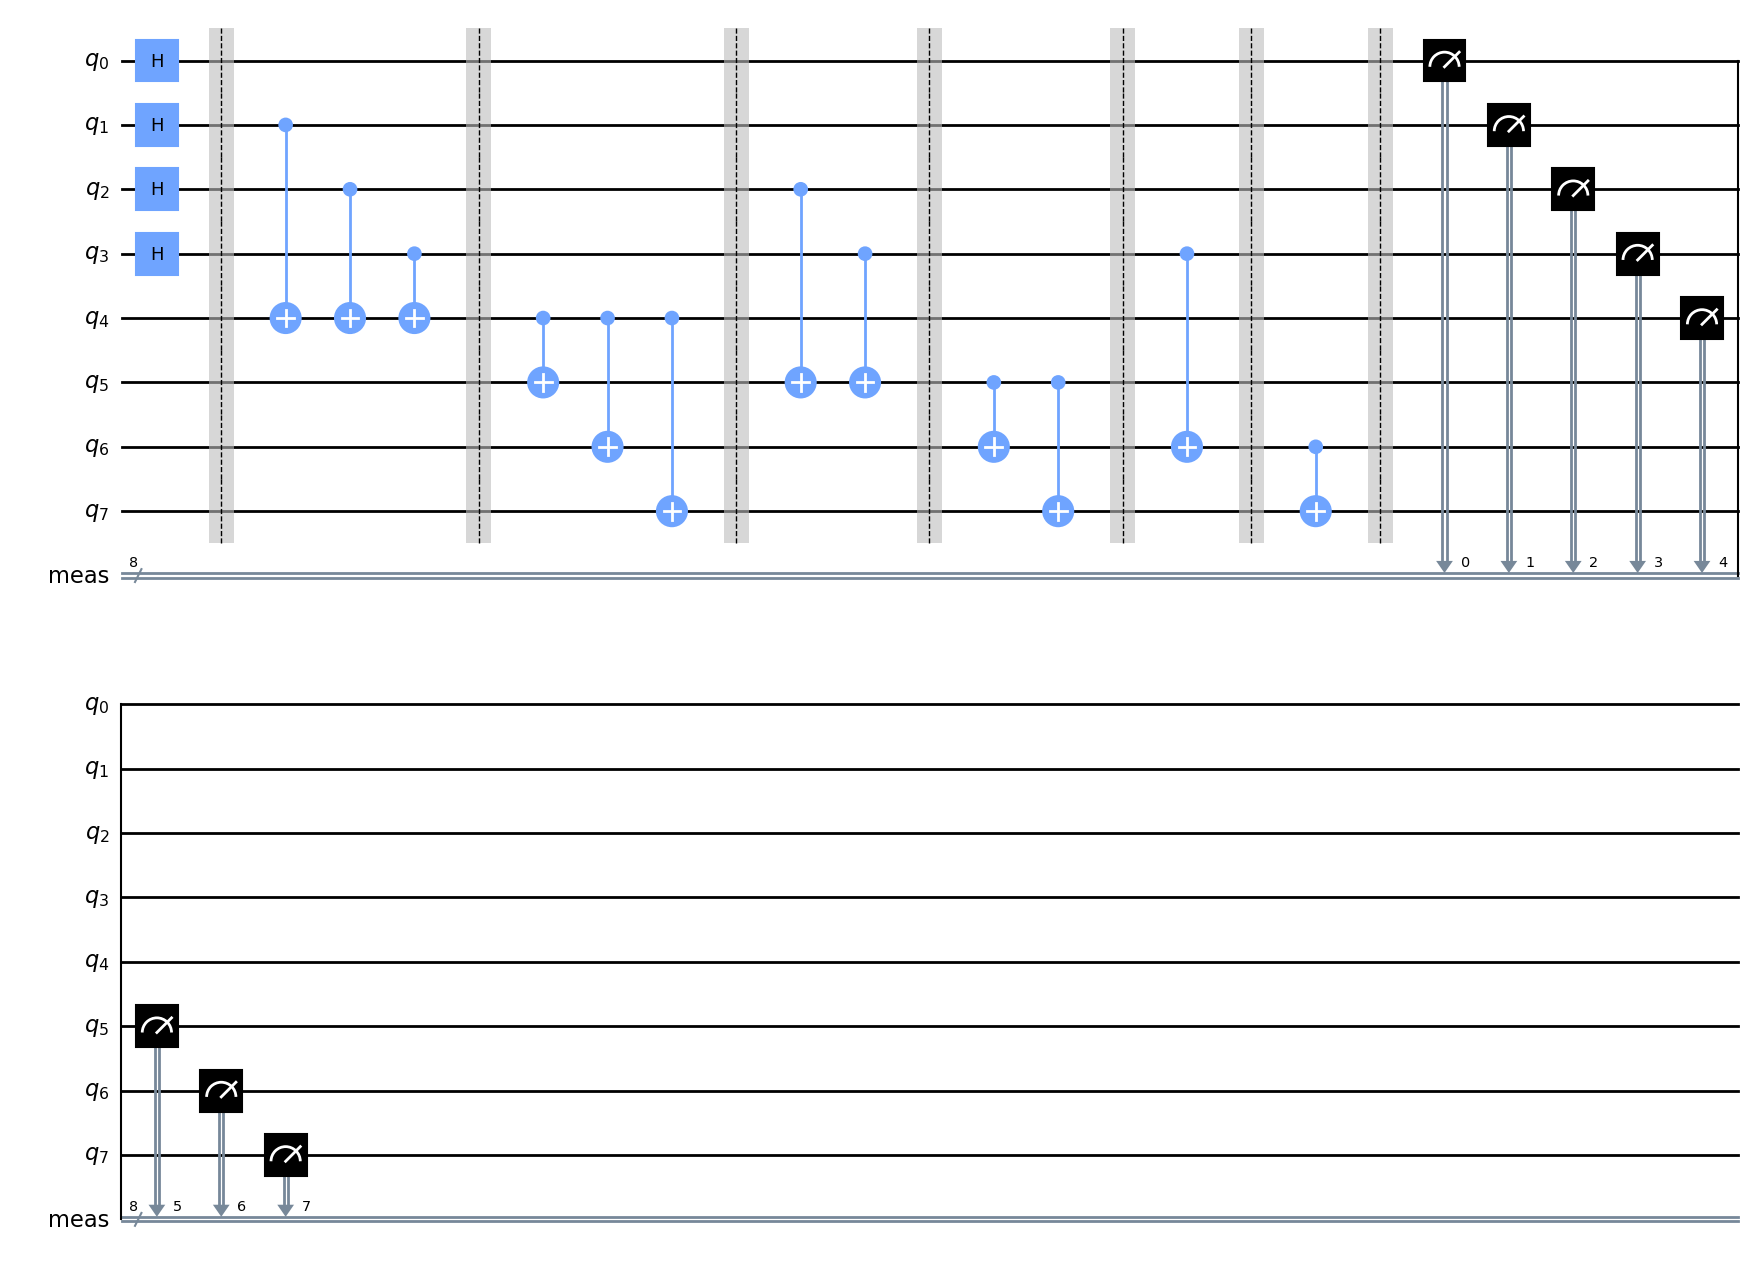

In [16]:
QC.measure_all()
QC.draw('mpl')

### Visulalisation des combinaisons

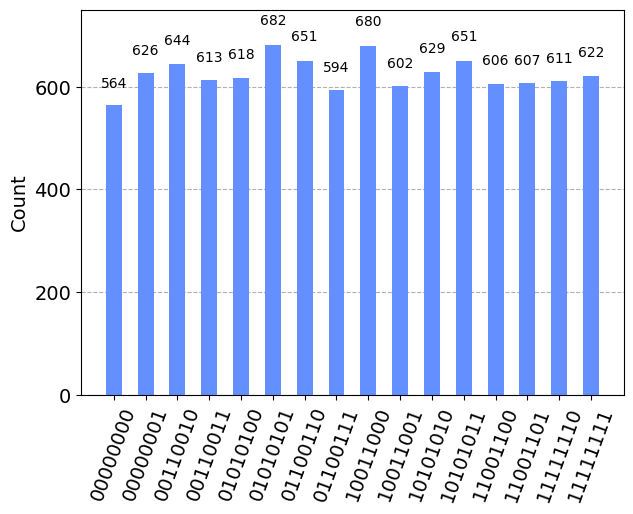

In [24]:
simulator = Aer.get_backend('qasm_simulator')
res = execute(QC, simulator, shots=10000).result()
counts = res.get_counts()
plot_histogram(counts)